## $$\text{Decision Models: Assignment - Neural Networks and Deep Learning}$$
$$By$$
### $$\text{Susmit Das}$$
$$SR-No.: 21717$$

## Neural Network Forward and Backward Propagation
This notebook demonstrates the manual computation of forward and backward propagation steps for a simple neural network architecture involving convolutional and fully connected layers with sigmoid activation functions.

### Neural Network Architecture
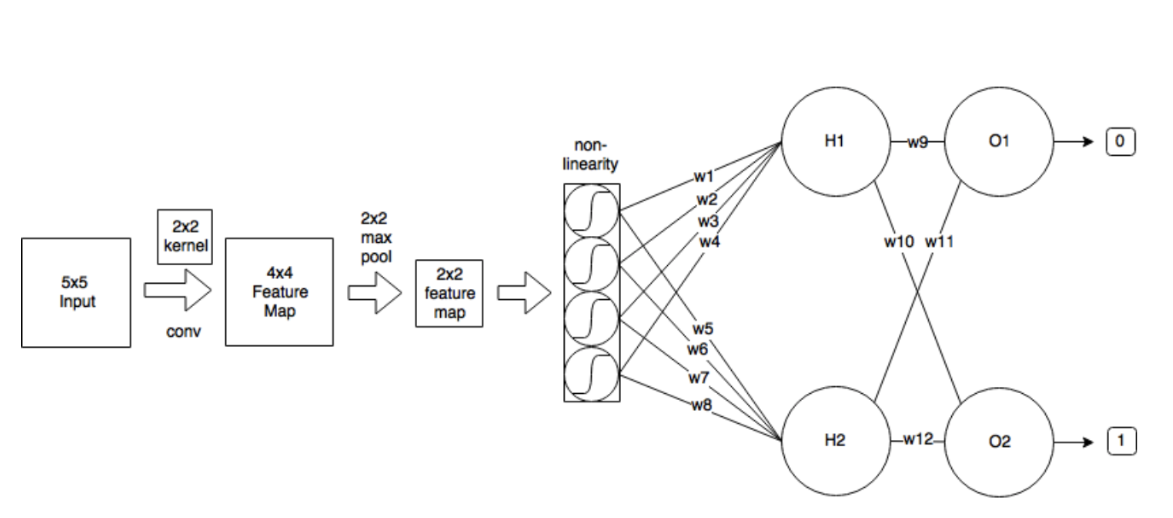

The architecture consists of the following layers:
- A 5x5 input layer, which is the initial data to be processed.
- A convolutional layer with a 2x2 kernel that convolves over the input data with a stride of 1, producing a 4x4 feature map.
- A 2x2 max pooling layer that reduces the spatial size of the convolved feature map to a 2x2 feature map by taking the maximum value in each 2x2 window of the feature map.
- A flattening step that transforms the 2x2 feature map into a single vector of 4 features.
- A sigmoid activation function applied after the pooling layer to introduce non-linearity before passing data to the fully connected layer.
- A single fully connected hidden layer with two neurons $H1$ and $H2$, each applying the sigmoid activation function to its input.
- An output layer with two neurons $O1$ and $O2$, each again using the sigmoid activation function to output the final predictions of the network.
- The loss function is Mean Squared Error (MSE), which is used to compute the error for backpropagation.

First, we initialize the weights and define the input matrix.

### Notation:
- $w_{conv}$: Weights of the convolutional kernel
- $w_{1}$ to $w_{8}$: Weights from the flattened feature map to the hidden layer neurons
- $w_{9}$ to $w_{12}$: Weights from the hidden layer to the output layer neurons
- $H1$, $H2$: Outputs from the hidden layer neurons
- $O1$, $O2$: Outputs from the output layer neurons
- $E$: Total error of the network
- $\eta$: Learning rate

In [1]:
import numpy as np

# Define the 5x5 input matrix
input_matrix = np.array([
    [0.51, 0.90, 0.88, 0.84, 0.05],
    [0.40, 0.62, 0.22, 0.59, 0.10],
    [0.11, 0.20, 0.74, 0.33, 0.14],
    [0.47, 0.01, 0.85, 0.70, 0.09],
    [0.76, 0.19, 0.72, 0.17, 0.57]
])

# Given target outputs
targets = np.array([0, 1])

learning_rate = 0.001

In [2]:
# Set the seed for reproducibility
np.random.seed(0)

# Randomly initialize weights
w_conv = np.random.randn(2, 2)
w_1_to_4 = np.random.randn(4)
w_5_to_8 = np.random.randn(4)
w_9_to_12 = np.random.randn(4)

weights = {
    'w_conv': w_conv,
    'w_1_to_4': w_1_to_4,
    'w_5_to_8': w_5_to_8,
    'w_9_to_12': w_9_to_12
}

print(f"Initial weights for w_conv:")
print(w_conv)
for i, w in enumerate(w_1_to_4.tolist() + w_5_to_8.tolist() + w_9_to_12.tolist()):
    print(f"Initial weights for w_{i+1}: {w}")

Initial weights for w_conv:
[[1.76405235 0.40015721]
 [0.97873798 2.2408932 ]]
Initial weights for w_1: 1.8675579901499675
Initial weights for w_2: -0.977277879876411
Initial weights for w_3: 0.9500884175255894
Initial weights for w_4: -0.1513572082976979
Initial weights for w_5: -0.10321885179355784
Initial weights for w_6: 0.41059850193837233
Initial weights for w_7: 0.144043571160878
Initial weights for w_8: 1.454273506962975
Initial weights for w_9: 0.7610377251469934
Initial weights for w_10: 0.12167501649282841
Initial weights for w_11: 0.44386323274542566
Initial weights for w_12: 0.33367432737426683


For current implementation, we have the following values:

Initial weights, $w_{\text{conv}}$:
$
\begin{bmatrix}
    1.76405235 & 0.40015721 \\
    0.97873798 & 2.2408932
\end{bmatrix}
$

Initial weights, $w_1$: 1.8675579901499675

Initial weights, $w_2$: -0.977277879876411

Initial weights, $w_3$: 0.9500884175255894

Initial weights, $w_4$: -0.1513572082976979

Initial weights, $w_5$: -0.10321885179355784

Initial weights, $w_6$: 0.41059850193837233

Initial weights, $w_7$: 0.144043571160878

Initial weights, $w_8$: 1.454273506962975

Initial weights, $w_9$: 0.7610377251469934

Initial weights, $w_{10}$: 0.12167501649282841

Initial weights, $w_{11}$: 0.44386323274542566

Initial weights, $w_{12}$: 0.33367432737426683

## Forward Propagation Process

Forward propagation is the process of moving input data through a neural network to obtain an output. In our convolutional neural network (CNN), the forward pass involves several steps, each applying specific operations to transform the input data into outputs, which are then used for backpropagation.

### Steps of Forward Propagation:

1. **Convolution**:
   - We apply a 2x2 convolutional kernel to a 5x5 input matrix. The kernel moves across the input matrix with a stride of 1 to produce a 4x4 feature map.
   - The convolution operation for each element in the feature map is given by:
   $$ \text{FeatureMap}_{i,j} = \sum_{m} \sum_{n} \text{Input}_{i+m, j+n} \cdot w_{conv_{m,n}} $$
   where $w_{conv}$ represents the convolutional kernel weights.

In [3]:
def convolve2d(input_matrix, kernel, stride=1):
    kernel_height, kernel_width = kernel.shape
    input_height, input_width = input_matrix.shape
    
    output_height = (input_height - kernel_height) // stride + 1
    output_width = (input_width - kernel_width) // stride + 1
    
    new_image = np.zeros((output_height, output_width))
    
    for y in range(0, output_height):
        for x in range(0, output_width):
            new_image[y][x] = np.sum(input_matrix[y:y+kernel_height, x:x+kernel_width] * kernel).squeeze()
    return new_image

feature_map = convolve2d(input_matrix, weights['w_conv'])
print(f"Feature Map after Convolution:")
print(feature_map)

Feature Map after Convolution:
[[3.04065716 3.03959951 3.42594746 2.30335656]
 [1.50955823 3.0357556  2.08794513 1.71751519]
 [0.75649298 2.5634734  3.83800314 1.52495626]
 [2.00271675 2.15717747 2.86519773 2.71454537]]


2. **Max Pooling**:
   - Following convolution, a 2x2 max pooling operation is applied to reduce the spatial dimensions of the feature map.
   - For each 2x2 area in the feature map, the maximum value is selected, resulting in a 2x2 pooled feature map.

In [4]:
def max_pooling(feature_map, size=2, stride=2):
    pool_height, pool_width = feature_map.shape[0] // size, feature_map.shape[1] // size
    pooled_features = np.zeros((pool_height, pool_width))
    
    for y in range(0, pool_height):
        for x in range(0, pool_width):
            pooled_features[y, x] = np.max(feature_map[y*stride:y*stride+size, x*stride:x*stride+size])
    return pooled_features

pooled_feature_map = max_pooling(feature_map)
print(f"Pooled Feature Map:")
print(pooled_feature_map)

Pooled Feature Map:
[[3.04065716 3.42594746]
 [2.5634734  3.83800314]]


3. **Flattening**:
   - The pooled feature map is then flattened into a single vector of features, then passed through a sigmoid activation function, which can be fed into the fully connected layer. Sigmoid function is defined as:
   
   $$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

flattened_features = pooled_feature_map.flatten()
sigmoid_features = sigmoid(flattened_features)
print("Sigmoid Features:")
print(sigmoid_features)

Sigmoid Features:
[0.95437745 0.96850569 0.92847347 0.97891748]


4. **Fully Connected Layer**:
   - The flattened feature vector is passed through a fully connected layer with two hidden neurons (H1 and H2). Each neuron applies a sigmoid activation function to its input.
   - The output of each hidden neuron is calculated as:
   $$ H{k} = \sigma \left( \sum_{i} w_{i} \cdot s_{i} \right) $$
   where $w_{i}$ are the weights connecting the flattened features to the hidden neuron, $s_{i}$ are the elements of the flattened feature vector, and $\sigma$ is the sigmoid function.
   
   Here, the outputs of each hidden neurons from the above formulae are:
   
$$  H1 = \sigma(w_1 \cdot s_1 + w_2 \cdot s_2 + w_3 \cdot s_3 + w_4 \cdot s_4) $$

$$  H2 = \sigma(w_5 \cdot s_1 + w_6 \cdot s_2 + w_7 \cdot s_3 + w_8 \cdot s_4) $$


In [6]:
H1_output = sigmoid(np.dot(sigmoid_features, weights['w_1_to_4']))
H2_output = sigmoid(np.dot(sigmoid_features, weights['w_5_to_8']))
print(f"H1_output: {H1_output}")
print(f"H2_output: {H2_output}")

H1_output: 0.8277581918035074
H2_output: 0.8648898321761768


5. **Output Layer**:
   - Finally, the outputs of the hidden layer are passed to the output layer, which also uses the sigmoid activation function. The network has two output neurons (O1 and O2), and their outputs are calculated similarly to the hidden neurons:
   $$ O_{l} = \sigma \left( w_{9} \cdot H1 + w_{10} \cdot H2 \right) $$
   for the first output neuron, and
   $$ O_{l} = \sigma \left( w_{11} \cdot H1 + w_{12} \cdot H2 \right) $$
   for the second output neuron, where $w_{9}$ to $w_{12}$ are the weights from the hidden neurons to the output neurons

In [7]:
O1_output = sigmoid(weights['w_9_to_12'][0] * H1_output + weights['w_9_to_12'][1] * H2_output)
O2_output = sigmoid(weights['w_9_to_12'][2] * H1_output + weights['w_9_to_12'][3] * H2_output)
print(f"O1_output: {O1_output}")
print(f"O2_output: {O2_output}")

O1_output: 0.6759432999019798
O2_output: 0.6583619381178293


In [8]:
# Collect the outputs from each layer

forward_pass_outputs = {
    'feature_map': feature_map,
    'pooled_feature_map': pooled_feature_map,
    'flattened_features': flattened_features,
    'sigmoid_features': sigmoid_features,
    'H1_output': H1_output,
    'H2_output': H2_output,
    'O1_output': O1_output,
    'O2_output': O2_output
}
for key, value in forward_pass_outputs.items():
    print(f"{key}: {value}")

feature_map: [[3.04065716 3.03959951 3.42594746 2.30335656]
 [1.50955823 3.0357556  2.08794513 1.71751519]
 [0.75649298 2.5634734  3.83800314 1.52495626]
 [2.00271675 2.15717747 2.86519773 2.71454537]]
pooled_feature_map: [[3.04065716 3.42594746]
 [2.5634734  3.83800314]]
flattened_features: [3.04065716 3.42594746 2.5634734  3.83800314]
sigmoid_features: [0.95437745 0.96850569 0.92847347 0.97891748]
H1_output: 0.8277581918035074
H2_output: 0.8648898321761768
O1_output: 0.6759432999019798
O2_output: 0.6583619381178293


These are the outputs of the first manual forward pass:

1. Feature map:
   $$ \text{feature_map}_\text{output} = \begin{bmatrix} 3.0406497 & 3.03959311 & 3.42594019 & 2.30335449 \\ 1.5095541 & 3.03575084 & 2.08794019 & 1.71751325 \\ 0.75649146 & 2.56346646 & 3.83799727 & 1.52495424 \\ 2.00271472 & 2.15717056 & 2.8651923 & 2.71454182 \end{bmatrix} $$

2. Pooled feature map:
   $$ \text{pooled_feature_map}_\text{output} = \begin{bmatrix} 3.0406497 & 3.42594019 \\ 2.56346646 & 3.83799727 \end{bmatrix} $$

3. Flattened features:
   $$ \text{flattened_features}_\text{output} = [3.0406497, 3.42594019, 2.56346646, 3.83799727] $$

4. Sigmoid features:
   $$ \text{sigmoid_features}_\text{output} = [0.95437713, 0.96850547, 0.92847301, 0.97891736] $$

5. H1 output, $ \text{H1}_\text{output} $ = 0.8277317284803233

6. H2 output, $ \text{H2}_\text{output} $ = 0.8648932569716911

7. O1 output, $ \text{O1}_\text{output} $ = 0.6759177984208319

8. O2 output, $ \text{O2}_\text{output} $ = 0.6583397696237019


## Backpropagation Process

Backpropagation is the process of training a neural network by updating the weights to minimize the error. The error is the difference between the network's output and the expected output. The steps for backpropagation involve calculating the gradient of the error with respect to each weight using chain rule and then adjusting the weights in the direction that reduces the error.

Let's find the mathematical expression for the each gradients first. Then we can look to adusting the weights in detail.

1. **Error for Each Output Neuron**:
   $$ E_i = (O_i - t_i)^2 $$
   Here, $E_i$ is the error for output neuron $i$, $O_i$ is the output of neuron $i$, and $t_i$ is the target value for that neuron.

2. **Derivative of the Error with Respect to the Output**:
   $$ \frac{\partial E}{\partial O_i} = 2 \times (O_i - t_i) $$
   This derivative will be used to propagate the error back through the network.

3. **Output of Each Neuron (Sigmoid Function)**:
   $$ O_i = \sigma(\text{Net}_i) $$
   $$ H_j = \sigma(\text{Net}_j) $$
   $$ S_k = \sigma(F_l) $$
   Where $\sigma$ is the sigmoid activation function, $H_j$ are the outputs of the hidden layer neurons, and $S_k$ are the outputs of the sigmoid function applied to the pooling layer's output.

4. **Derivative of the Sigmoid Function**:
   $$ \sigma'(x) = \sigma(x) \cdot (1 - \sigma(x)) $$

5. **Gradient for Weights between Hidden Layer and Output Layer** ($w_h$):
   $$ \frac{\partial E}{\partial w_h} = \frac{\partial E}{\partial O_i} \cdot \frac{\partial O_i}{\partial \text{Net}_i} \cdot \frac{\partial \text{Net}_i}{\partial w_h} $$
   $$ \frac{\partial E}{\partial w_h} = 2 \times (O_i - t_i) \cdot O_i \cdot (1 - O_i) \cdot H_j $$

6. **Gradient for Weights between Pooling Layer and Hidden Layer** ($w_s$):
   $$ \frac{\partial E}{\partial w_s} = \frac{\partial E}{\partial H_j} \cdot \frac{\partial H_j}{\partial S_k} \cdot \frac{\partial S_k}{\partial w_s} $$
   $$ \frac{\partial E}{\partial w_s} = \frac{\partial E}{\partial H_j} \cdot H_j \cdot (1 - H_j) \cdot S_k $$

7. **Gradient for Convolutional Kernel Weights** ($w_{conv}$):
   $$ \frac{\partial E}{\partial w_{conv}} = \frac{\partial E}{\partial S_k} \cdot \frac{\partial S_k}{\partial F_l} \cdot \frac{\partial F_l}{\partial w_{conv}} $$
   $$ \frac{\partial E}{\partial w_{conv}} = \sum_{k} \left( \frac{\partial E}{\partial S_k} \cdot S_k \cdot (1 - S_k) \right) \cdot X_m $$
   Here, $S_k$ represents the output of the sigmoid function applied to the pooled feature map. The term $\sum_{k}$ indicates summing over all positions where the kernel and input overlap during the convolution operation, and $X_m$ is the input patch corresponding to the kernel position.

Let us start with backward pass process in detail now with the current weights, input and outputs.

### Error Calculation:
The error for each output neuron is calculated using Mean Squared Error (MSE):
$$ MSE = \frac{1}{n}\sum_{i}(target_{i} - output_{i})^2 $$
The total error is the sum of errors from both output neurons.
$$ E = MSE_{1} + MSE_{2} $$


In [9]:
# Calculate the errors for the output neurons
E1 = (forward_pass_outputs['O1_output'] - targets[0]) ** 2
E2 = (forward_pass_outputs['O2_output'] - targets[1]) ** 2
total_error = E1 + E2
print(f"Error for O1: {E1}")
print(f"Error for O2: {E2}")
print(f"Total Error: {total_error}")

Error for O1: 0.45689934468237775
Error for O2: 0.1167165653266059
Total Error: 0.5736159100089837


For current implementation, we have the following values from earlier:

Initial weights, $w_{\text{conv}}$:
$
\begin{bmatrix}
    1.76405235 & 0.40015721 \\
    0.97873798 & 2.2408932
\end{bmatrix}
$

Initial weights, $w_1$: 1.8675579901499675

Initial weights, $w_2$: -0.977277879876411

Initial weights, $w_3$: 0.9500884175255894

Initial weights, $w_4$: -0.1513572082976979

Initial weights, $w_5$: -0.10321885179355784

Initial weights, $w_6$: 0.41059850193837233

Initial weights, $w_7$: 0.144043571160878

Initial weights, $w_8$: 1.454273506962975

Initial weights, $w_9$: 0.7610377251469934

Initial weights, $w_{10}$: 0.12167501649282841

Initial weights, $w_{11}$: 0.44386323274542566

Initial weights, $w_{12}$: 0.33367432737426683

This is the result from the forward pass:

$O1_{output}$: 0.6759432999019798

$O2_{output}$: 0.6583619381178293

We can calculate the following:

Error for O1 = $E_1$ = 0.45689934468237775

Error for O2 =$E_2$ = 0.1167165653266059

Total Error, $E$: $E_1 + E_2 = 0.5736159100089837$

### Gradients for Output Layer Weights:
The gradients for the weights connecting the hidden layer to the output layer are calculated as follows:
$$ \frac{\partial E}{\partial w_{9}} = \frac{\partial E}{\partial O1} \cdot \frac{\partial O1}{\partial net_{O1}} \cdot \frac{\partial net_{O1}}{\partial w_{9}} $$
where:
- $\frac{\partial E}{\partial O1}$ is the derivative of the error with respect to the output $O1$, which is $2 \cdot (O_1 - t_1)$
- $\frac{\partial O1}{\partial net_{O1}}$ is the derivative of the output with respect to its net input, which is $O1 \cdot (1 - O1)$ due to the sigmoid activation function.
- $\frac{\partial net_{O1}}{\partial w_{9}}$ is the output of the hidden neuron $H1$.

The same process is applied to calculate $\frac{\partial E}{\partial w_{10}}$, $\frac{\partial E}{\partial w_{11}}$, and $\frac{\partial E}{\partial w_{12}}$.

The gradients for the weights connecting the hidden layer to the output layer would then be:
$$ \Delta w_9 = -\eta \cdot 2 \cdot (O_1 - t_1) \cdot O_1 \cdot (1 - O_1) \cdot H_1 $$
$$ \Delta w_{10} = -\eta \cdot 2 \cdot (O_1 - t_2) \cdot O_1 \cdot (1 - O_1) \cdot H_2 $$
$$ \Delta w_{11} = -\eta \cdot 2 \cdot (O_2 - t_1) \cdot O_2 \cdot (1 - O_2) \cdot H_1 $$
$$ \Delta w_{12} = -\eta \cdot 2 \cdot (O_2 - t_2) \cdot O_2 \cdot (1 - O_2) \cdot H_2 $$

In [10]:
# Calculate the gradients for the weights from hidden layer to output layer
# dE/dw_9 = dE1/dO1 * dO1/dnet_O1 * dnet_O1/dw_9
# dE/dw_10 = dE2/dO1 * dO1/dnet_O1 * dnet_O1/dw_10
# dE/dw_11 = dE1/dO2 * dO2/dnet_O2 * dnet_O2/dw_11
# dE/dw_12 = dE2/dO2 * dO2/dnet_O2 * dnet_O2/dw_12
dE1_dO1 = - 2 * (targets[0] - forward_pass_outputs['O1_output'])
dO1_dnetO1 = forward_pass_outputs['O1_output'] * (1 - forward_pass_outputs['O1_output'])
dnetO1_dw9 = forward_pass_outputs['H1_output']

dE2_dO1 = - 2 * (targets[1] - forward_pass_outputs['O1_output'])
# Note: dO1_dnetO1 is the same as above, since it's the same output neuron O1
dnetO1_dw10 = forward_pass_outputs['H2_output']

dE1_dO2 = - 2 * (targets[0] - forward_pass_outputs['O2_output'])
dO2_dnetO2 = forward_pass_outputs['O2_output'] * (1 - forward_pass_outputs['O2_output'])
dnetO2_dw11 = forward_pass_outputs['H1_output']

dE2_dO2 = - 2 * (targets[1] - forward_pass_outputs['O2_output'])
# Note: dO2_dnetO2 is the same as above, since it's the same output neuron O2
dnetO2_dw12 = forward_pass_outputs['H2_output']

# Gradients for output layer weights
grad_w9 = dE1_dO1 * dO1_dnetO1 * dnetO1_dw9
grad_w10 = dE2_dO1 * dO1_dnetO1 * dnetO1_dw10
grad_w11 = dE1_dO2 * dO2_dnetO2 * dnetO2_dw11
grad_w12 = dE2_dO2 * dO2_dnetO2 * dnetO2_dw12

# Update the weights for the output layer
weights['w_9_to_12'][0] -= learning_rate * grad_w9
weights['w_9_to_12'][1] -= learning_rate * grad_w10
weights['w_9_to_12'][2] -= learning_rate * grad_w11
weights['w_9_to_12'][3] -= learning_rate * grad_w12

# Store gradients for displaying
gradients = {
    'grad_w9': grad_w9,
    'grad_w10': grad_w10,
    'grad_w11': grad_w11,
    'grad_w12': grad_w12,
    'updated_w_9_to_12': weights['w_9_to_12']
}
print(f"dE1_dO1: {dE1_dO1}")
print(f"dO1_dnetO1: {dO1_dnetO1}")
print(f"dnetO1_dw9: {dnetO1_dw9}")
print(f"dE2_dO1: {dE2_dO1}")
print(f"dnetO1_dw10: {dnetO1_dw10}")
print(f"dE1_dO2: {dE1_dO2}")
print(f"dO2_dnetO2: {dO2_dnetO2}")
print(f"dnetO2_dw11: {dnetO2_dw11}")
print(f"dE2_dO2: {dE2_dO2}")
print(f"dnetO2_dw12: {dnetO2_dw12}")
print(f"grad_w_9: {grad_w9}")
print(f"grad_w_10: {grad_w10}")
print(f"grad_w_11: {grad_w11}")
print(f"grad_w_12: {grad_w12}")
print(f"Updated weight w_9: {weights['w_9_to_12'][0]}")
print(f"Updated weight w_10: {weights['w_9_to_12'][1]}")
print(f"Updated weight w_11: {weights['w_9_to_12'][2]}")
print(f"Updated weight w_12: {weights['w_9_to_12'][3]}")

dE1_dO1: 1.3518865998039595
dO1_dnetO1: 0.21904395521960202
dnetO1_dw9: 0.8277581918035074
dE2_dO1: -0.6481134001960405
dnetO1_dw10: 0.8648898321761768
dE1_dO2: 1.3167238762356586
dO2_dnetO2: 0.22492149655556481
dnetO2_dw11: 0.8277581918035074
dE2_dO2: -0.6832761237643414
dnetO2_dw12: 0.8648898321761768
grad_w_9: 0.24511789785387136
grad_w_10: -0.12278436404679686
grad_w_11: 0.24514845617318098
grad_w_12: -0.13291928641939774
Updated weight w_9: 0.7607926072491396
Updated weight w_10: 0.12179780085687521
Updated weight w_11: 0.4436180842892525
Updated weight w_12: 0.33380724666068623


Using the formulae as mentioned above, we can calculate the following for the current implementation:

1. Partial derivative of $E1$ with respect to $O1$ = $\frac{\partial E_1}{\partial O_1}$ = 1.3518865998039595

2. Partial derivative of $O1$ with respect to $net_{O1}$ = $\frac{\partial O_1}{\partial \text{net}_{O1}}$ = 0.21904395521960202

3. Partial derivative of $net_{O1}$ with respect to $w_{9}$ = $\frac{\partial \text{net}_{O1}}{\partial w_{9}}$ = 0.8277581918035074

4. Partial derivative of $E2$ with respect to $O1$ = $\frac{\partial E_2}{\partial O_1}$ = -0.6481134001960405

5. Partial derivative of $net_{O1}$ with respect to $w_{10}$ = $\frac{\partial \text{net}_{O1}}{\partial w_{10}}$ = 0.8648898321761768

6. Partial derivative of $E1$ with respect to $O2$ = $\frac{\partial E_1}{\partial O_2}$ = 1.3167238762356586

7. Partial derivative of $O2$ with respect to $net_{O2}$ = $\frac{\partial O_2}{\partial \text{net}_{O2}}$ = 0.22492149655556481

8. Partial derivative of $net_{O2}$ with respect to $w_{11}$ = $\frac{\partial \text{net}_{O2}}{\partial w_{11}}$ = 0.8277581918035074

9. Partial derivative of $E2$ with respect to $O2$ = $\frac{\partial E_2}{\partial O_2}$ = -0.6832761237643414

10. Partial derivative of $net_{O2}$ with respect to $w_{12}$ = $\frac{\partial \text{net}_{O2}}{\partial w_{12}}$ = 0.8648898321761768

11. Gradient for weight $w_{9}$ = $\text{grad}_{w_{9}}$ = 0.24511789785387136

12. Gradient for weight $w_{10}$ = $\text{grad}_{w_{10}}$ = -0.12278436404679686

13. Gradient for weight $w_{11}$ = $\text{grad}_{w_{11}}$ = 0.24514845617318098

14. Gradient for weight $w_{12}$ = $\text{grad}_{w_{12}}$ = -0.13291928641939774

15. Updated weight, $w_{9}$ = 0.7607926072491396

16. Updated weight, $w_{10}$ = 0.12179780085687521

17. Updated weight, $w_{11}$ = 0.4436180842892525

18. Updated weight, $w_{12}$ = 0.33380724666068623


### Gradients for Hidden Layer Weights:
The gradients for the weights connecting the sigmoid outputs of the flattened feature map to the hidden layer are derived using the chain rule. To update weights $w_1$ to $w_8$, we need to calculate the gradient of $E$ with respect to each of these weights.

We can apply the chain rule to get the following gradients:
For $i=1,2,3,4$:

$$ \frac{\partial E}{\partial w_i} = \frac{\partial E}{\partial H1} \cdot \frac{\partial H1}{\partial w_i} = \frac{\partial H1}{\partial E} \cdot \frac{\partial w_i}{\partial H1} $$

For $i=5,6,7,8$:

$$ \frac{\partial E}{\partial w_i} = \frac{\partial E}{\partial H2} \cdot \frac{\partial H2}{\partial w_i} = \frac{\partial H2}{\partial E} \cdot \frac{\partial w_i}{\partial H2} $$

Since $E$ is a sum of $E_1$ and $E_2$, we need to calculate these partial derivatives separately:
For $E_1$:

$$ \frac{\partial E_1}{\partial H1} = \frac{\partial E_1}{\partial O1} \cdot \frac{\partial O1}{\partial H1} \cdot \frac{\partial H1}{\partial E_1} = \frac{\partial O1}{\partial E_1} \cdot \frac{\partial H1}{\partial O1} $$

For $E_2$:

$$ \frac{\partial E_2}{\partial H2} = \frac{\partial E_2}{\partial O2} \cdot \frac{\partial O2}{\partial H2} \cdot \frac{\partial H2}{\partial E_2} = \frac{\partial O2}{\partial E_2} \cdot \frac{\partial H2}{\partial O2} $$

Since $H1$ and $H2$ are outputs of the sigmoid function, we have:
For $i=1,2,3,4$:

$$ \frac{\partial H1}{\partial w_i} = H1 \cdot (1 - H1) \cdot s_i $$

For $i=5,6,7,8$:

$$ \frac{\partial H2}{\partial w_i} = H2 \cdot (1 - H2) \cdot s_i $$

where $s_i$ are the sigmoid outputs of the flattened feature map

We can now plug these into the chain rule to get the full derivative for $w_i$. The update for each weight $w_i$ will then be:

$$ \Delta w_i = -\eta \cdot \frac{\partial E}{\partial w_i} $$

Hence, the full expression for the gradients for the weights connecting the sigmoid outputs of the flattened feature map to the hidden layer would then be:

$$ \Delta w_i = -\eta \cdot \frac{\partial E}{\partial H_1} \cdot H_1 \cdot (1 - H_1) \cdot s_i \text{ for } i = 1, 2, 3, 4 $$
$$ \Delta w_i = -\eta \cdot \frac{\partial E}{\partial H_2} \cdot H_2 \cdot (1 - H_2) \cdot s_i \text{ for } i = 5, 6, 7, 8 $$


In [11]:
# Calculate the gradients for the weights from flattened feature map to hidden layer neurons (w_1 to w_8)
# We need the gradients of the error with respect to the outputs of the hidden layer first
# which are then used to calculate the gradients with respect to the weights
dE_dH1 = (dE1_dO1 * w_9_to_12[0] + dE1_dO2 * w_9_to_12[2]) * dO1_dnetO1
dE_dH2 = (dE2_dO1 * w_9_to_12[1] + dE2_dO2 * w_9_to_12[3]) * dO2_dnetO2

# The gradients with respect to the weights are the product of the gradients of the error with respect to the outputs
# of the hidden layer and the derivative of the outputs of the hidden layer with respect to the weights.
# Remember to multiply by the corresponding sigmoid feature for each weight.
grad_w_1_to_4 = dE_dH1 * H1_output * (1 - H1_output) * sigmoid_features[:4]
grad_w_5_to_8 = dE_dH2 * H2_output * (1 - H2_output) * sigmoid_features[:4]

# Update the weights for the hidden layer
weights['w_1_to_4'] -= learning_rate * grad_w_1_to_4
weights['w_5_to_8'] -= learning_rate * grad_w_5_to_8

# Store gradients for displaying
gradients.update({
    'grad_w_1_to_4': grad_w_1_to_4,
    'grad_w_5_to_8': grad_w_5_to_8,
    'updated_w_1_to_4': weights['w_1_to_4'],
    'updated_w_5_to_8': weights['w_5_to_8']
})

# Print the gradients and updated weights individually
print(f"dE_dH1: {dE_dH1}")
print(f"dE_dH2: {dE_dH2}")
for i in range(4):
    print(f"grad_w_{i+1}: {grad_w_1_to_4[i]}")
for i in range(4):
    print(f"grad_w_{i+5}: {grad_w_5_to_8[i]}")
for i in range(4):
    print(f"Updated weight w_{i+1}: {weights['w_1_to_4'][i]}")
for i in range(4):
    print(f"Updated weight w_{i+5}: {weights['w_5_to_8'][i]}")

dE_dH1: 0.35323638354339076
dE_dH2: -0.06905569216708796
grad_w_1: 0.048064857946680715
grad_w_2: 0.04877639171724259
grad_w_3: 0.046760268132586026
grad_w_4: 0.0493007558027989
grad_w_5: -0.007701378664579531
grad_w_6: -0.007815386928284625
grad_w_7: -0.0074923456914364065
grad_w_8: -0.00789940520179029
Updated weight w_1: 1.8675099252920209
Updated weight w_2: -0.9773266562681283
Updated weight w_3: 0.9500416572574568
Updated weight w_4: -0.1514065090535007
Updated weight w_5: -0.10321115041489326
Updated weight w_6: 0.4106063173253006
Updated weight w_7: 0.14405106350656943
Updated weight w_8: 1.4542814063681768


Using the formulae as mentioned above, we can calculate the following for the current implementation:

1. Partial derivative of $E$ with respect to $H1$ = $\frac{\partial E}{\partial H_1}$ = 0.35323638354339076

2. Partial derivative of $E$ with respect to $H2$ = $\frac{\partial E}{\partial H_2}$ = -0.06905569216708796

3. Gradient for weight $w_{1}$ = $\text{grad}_{w_{1}}$ = 0.048064857946680715

4. Gradient for weight $w_{2}$ = $\text{grad}_{w_{2}}$ = 0.04877639171724259

5. Gradient for weight $w_{3}$ = $\text{grad}_{w_{3}}$ = 0.046760268132586026

6. Gradient for weight $w_{4}$ = $\text{grad}_{w_{4}}$ = 0.0493007558027989

7. Gradient for weight $w_{5}$ = $\text{grad}_{w_{5}}$ = -0.007701378664579531

8. Gradient for weight $w_{6}$ = $\text{grad}_{w_{6}}$ = -0.007815386928284625

9. Gradient for weight $w_{7}$ = $\text{grad}_{w_{7}}$ = -0.0074923456914364065

10. Gradient for weight $w_{8}$ = $\text{grad}_{w_{8}}$ = -0.00789940520179029

11. Updated weight, $w_{1}$ = 1.8675099252920209

12. Updated weight, $w_{2}$ = -0.9773266562681283

13. Updated weight, $w_{3}$ = 0.9500416572574568

14. Updated weight, $w_{4}$ = -0.1514065090535007

15. Updated weight, $w_{5}$ = -0.10321115041489326

16. Updated weight, $w_{6}$ = 0.4106063173253006

17. Updated weight, $w_{7}$ = 0.14405106350656943

18. Updated weight, $w_{8}$ = 1.4542814063681768

### Gradients for Convolutional Kernel Weights:
Finally, for the convolutional kernel weights, we backpropagate through the pooling and convolutional layers. The gradients for $w_{conv}$ are computed by applying the gradients from the pooling layer to the regions of the input that correspond to the kernel during the forward pass.

The update for each convolutional kernel weight $w_{conv_{ij}}$ is:
$$ \Delta w_{conv_{ij}} = -\eta \cdot \sum (\text{Gradient from pooling layer} \times \text{Input patch corresponding to } w_{conv_{ij}}) $$
or,    $$ \Delta w_{conv_{ij}} = -\eta \cdot \sum_{k} \left( \frac{\partial E}{\partial S_k} \cdot S_k \cdot (1 - S_k) \right) \cdot X_m $$
where, $S_k$ represents the output of the sigmoid function applied to the pooled feature map, the term $\sum_{k}$ indicates summing over all positions where the kernel and input overlap during the convolution operation, and $X_m$ is the input patch corresponding to the kernel position.

In [12]:
# Backpropagate through the fully connected layers to get the gradients on the sigmoid features
grad_sigmoid_features = np.zeros_like(sigmoid_features)
grad_sigmoid_features += w_1_to_4 * dE_dH1 * H1_output * (1 - H1_output)
grad_sigmoid_features += w_5_to_8 * dE_dH2 * H2_output * (1 - H2_output)

# Backpropagate through the sigmoid function (inverse of sigmoid)
# Since sigmoid_features = sigmoid(flattened_features), we need to find the gradient with respect to the input of sigmoid
# which is the flattened_features
grad_flattened_features = grad_sigmoid_features * sigmoid_features * (1 - sigmoid_features)

# Map the gradients back through the pooling layer to the convolved feature map
# For max pooling, the gradient is passed back only to the maximum value in the pooling window
grad_feature_map = np.zeros_like(feature_map)

# We need to find the positions of the maxima for each pooling window
for i in range(pooled_feature_map.shape[0]):
    for j in range(pooled_feature_map.shape[1]):
        pool_region = feature_map[i*2:(i+1)*2, j*2:(j+1)*2]
        max_pos = np.unravel_index(np.argmax(pool_region, axis=None), pool_region.shape)
        grad_feature_map[i*2 + max_pos[0], j*2 + max_pos[1]] = grad_flattened_features[i*2 + j]

# Now, calculate the gradients for the convolutional kernel weights
# This is similar to the forward convolution operation, but now we're using the gradients instead of the input
grad_w_conv = np.zeros_like(w_conv)
for i in range(grad_w_conv.shape[0]):
    for j in range(grad_w_conv.shape[1]):
        input_patch = input_matrix[i:i+grad_feature_map.shape[0], j:j+grad_feature_map.shape[1]]
        grad_w_conv[i, j] = np.sum(input_patch * grad_feature_map)

# Update the convolutional kernel weights
weights['w_conv'] -= learning_rate * grad_w_conv

# Store the gradients for displaying
gradients.update({
    'grad_w_conv': grad_w_conv,
    'updated_w_conv': weights['w_conv']
})
print(f"grad_sigmoid_features:")
print(grad_sigmoid_features)
print(f"grad_flattened_features:")
print(grad_flattened_features)
print(f"grad_feature_map:")
print(grad_feature_map)
print(f"grad_w_conv:")
print(grad_w_conv)
print(f"Updated weight w_conv:")
print(weights['w_conv'])

grad_sigmoid_features:
[ 0.09488538 -0.05253404  0.04668407 -0.01936058]
grad_flattened_features:
[ 0.00413142 -0.00160242  0.00310031 -0.00039956]
grad_feature_map:
[[ 0.00413142  0.         -0.00160242  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.00310031 -0.00039956  0.        ]
 [ 0.          0.          0.          0.        ]]
grad_w_conv:
[[0.00102128 0.00453462]
 [0.00099141 0.00397162]]
Updated weight w_conv:
[[1.76405132 0.40015267]
 [0.97873699 2.24088923]]


Using the formulae as mentioned above, we can calculate the following for the current implementation:

1. Gradient of the sigmoid activation for features = $\text{grad}_{\text{sigmoid features}} = [0.09488538, -0.05253404, 0.04668407, -0.01936058]$

2. Gradient of the flattened features = $\text{grad}_{\text{flattened features}} = [0.00413142, -0.00160242, 0.00310031, -0.00039956]$


3. Gradient of the feature map:
   $$ \text{grad}_{\text{feature map}} = \begin{bmatrix} 0.00413142 & 0 & -0.00160242 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0.00310031 & -0.00039956 & 0 \\ 0 & 0 & 0 & 0 \end{bmatrix} $$


4. Gradient for the convolutional kernel weights:
   $$ \text{grad}_{w_{\text{conv}}} = \begin{bmatrix} 0.00102128 & 0.00453462 \\ 0.00099141 & 0.00397162 \end{bmatrix} $$


5. Updated weight for the convolutional kernel:
   $$ w_{\text{conv}} = \begin{bmatrix} 1.76405132 & 0.40015267 \\ 0.97873699 & 2.24088923 \end{bmatrix} $$


## Second Manual Forward Pass

After updating the weights from the first backpropagation, we perform another forward pass through the network. The updated weights are used to convolve the input matrix, apply max pooling, flatten the resulting feature map, and calculate the outputs of the hidden and output layers using the sigmoid activation function.

### Convolution and Pooling

The convolution operation is applied to the input matrix using the updated kernel weights `w_conv`, producing a new feature map. The max pooling operation is then applied to this feature map, resulting in a pooled feature map.

### Flattening and Activation

The pooled feature map is flattened into a vector, which is then passed through a sigmoid activation function to introduce non-linearity before feeding into the fully connected layer.

### Hidden Layer Output

The outputs of the neurons in the hidden layer (H1 and H2) are calculated using the updated weights $w_{1}$ to $w_{8}$.

### Output Layer

The outputs of the neurons in the output layer (O1 and O2) are computed with the updated weights $w_{9}$ to $w_{12}$.

In [13]:
# Convolve the input matrix
feature_map = convolve2d(input_matrix, w_conv)

# Apply max pooling
pooled_feature_map = max_pooling(feature_map)

# Flatten the pooled feature map
flattened_features = pooled_feature_map.flatten()

# Apply the sigmoid activation function to the flattened feature vector
sigmoid_features = sigmoid(flattened_features)

# Calculate the outputs of the neurons in the hidden layer (H1 and H2)
H1_output = sigmoid(np.dot(sigmoid_features, w_1_to_4))
H2_output = sigmoid(np.dot(sigmoid_features, w_5_to_8))

# Calculate the outputs of the neurons in the output layer (O1 and O2)
O1_output = sigmoid(w_9_to_12[0] * H1_output + w_9_to_12[1] * H2_output)
O2_output = sigmoid(w_9_to_12[2] * H1_output + w_9_to_12[3] * H2_output)

# Collect the outputs from each layer
forward_pass_2_outputs = {
    'feature_map': feature_map,
    'pooled_feature_map': pooled_feature_map,
    'flattened_features': flattened_features,
    'sigmoid_features': sigmoid_features,
    'H1_output': H1_output,
    'H2_output': H2_output,
    'O1_output': O1_output,
    'O2_output': O2_output
}
for key, value in forward_pass_2_outputs.items():
    print(f"{key}: {value}")

feature_map: [[3.0406497  3.03959311 3.42594019 2.30335449]
 [1.5095541  3.03575084 2.08794019 1.71751325]
 [0.75649146 2.56346646 3.83799727 1.52495424]
 [2.00271472 2.15717056 2.8651923  2.71454182]]
pooled_feature_map: [[3.0406497  3.42594019]
 [2.56346646 3.83799727]]
flattened_features: [3.0406497  3.42594019 2.56346646 3.83799727]
sigmoid_features: [0.95437713 0.96850547 0.92847301 0.97891736]
H1_output: 0.8277317284803233
H2_output: 0.8648932569716911
O1_output: 0.6759177984208319
O2_output: 0.6583397696237019


Outputs of second manual forward pass:

1. Feature map :
   $$ \text{feature_map}_\text{output} = \begin{bmatrix} 3.0406497 & 3.03959311 & 3.42594019 & 2.30335449 \\ 1.5095541 & 3.03575084 & 2.08794019 & 1.71751325 \\ 0.75649146 & 2.56346646 & 3.83799727 & 1.52495424 \\ 2.00271472 & 2.15717056 & 2.8651923 & 2.71454182 \end{bmatrix} $$

2. Pooled feature map:
   $$ \text{pooled_feature_map}_\text{output} = \begin{bmatrix} 3.0406497 & 3.42594019 \\ 2.56346646 & 3.83799727 \end{bmatrix} $$

3. Flattened features:
   $$ \text{flattened_features}_\text{output} = [3.0406497, 3.42594019, 2.56346646, 3.83799727] $$

4. Sigmoid features:
   $$ \text{sigmoid_features}_\text{output} = [0.95437713, 0.96850547, 0.92847301, 0.97891736] $$

5. H1 output, $ \text{H1}_\text{output} $ = 0.8277317284803233

6. H2 output, $ \text{H2}_\text{output} $ = 0.8648932569716911

7. O1 output, $ \text{O1}_\text{output} $ = 0.6759177984208319

8. O2 output, $ \text{O2}_\text{output} $ = 0.6583397696237019


In [14]:
# Calculate the errors for the output neurons
E1 = (forward_pass_2_outputs['O1_output'] - targets[0]) ** 2
E2 = (forward_pass_2_outputs['O2_output'] - targets[1]) ** 2
total_error = E1 + E2
print(f"Error for O1: {E1}")
print(f"Error for O2: {E2}")
print(f"Total Error: {total_error}")

Error for O1: 0.45686487022206435
Error for O2: 0.1167317130207851
Total Error: 0.5735965832428495


This total error is lesser compared to the last total error of `0.5736159100089837`, showing a slight decrease as the network learns from the data.

## Second Manual Backward Pass

Similarly to the first iteration, we conduct a second backward pass through the network. This involves the following steps:

- Calculate the gradient of the loss with respect to the output neurons' activations.
- Backpropagate these gradients through the network to compute the gradients with respect to the weights connecting the output layer to the hidden layer, and then the hidden layer to the input layer.
- Update the weights by subtracting a fraction of the calculated gradients, scaled by the learning rate.

The updated weights will then be used for the next iteration of forward and backward passes as we continue to train the network and reduce the error.

In [15]:
# Calculate the gradients for the weights from hidden layer to output layer
# dE/dw_9 = dE1/dO1 * dO1/dnet_O1 * dnet_O1/dw_9
# dE/dw_10 = dE2/dO1 * dO1/dnet_O1 * dnet_O1/dw_10
# dE/dw_11 = dE1/dO2 * dO2/dnet_O2 * dnet_O2/dw_11
# dE/dw_12 = dE2/dO2 * dO2/dnet_O2 * dnet_O2/dw_12
dE1_dO1 = - 2 * (targets[0] - forward_pass_2_outputs['O1_output'])
dO1_dnetO1 = forward_pass_outputs['O1_output'] * (1 - forward_pass_outputs['O1_output'])
dnetO1_dw9 = forward_pass_outputs['H1_output']

dE2_dO1 = - 2 * (targets[1] - forward_pass_2_outputs['O1_output'])
# Note: dO1_dnetO1 is the same as above, since it's the same output neuron O1
dnetO1_dw10 = forward_pass_outputs['H2_output']

dE1_dO2 = - 2 * (targets[0] - forward_pass_2_outputs['O2_output'])
dO2_dnetO2 = forward_pass_outputs['O2_output'] * (1 - forward_pass_outputs['O2_output'])
dnetO2_dw11 = forward_pass_outputs['H1_output']

dE2_dO2 = - 2 * (targets[1] - forward_pass_2_outputs['O2_output'])
# Note: dO2_dnetO2 is the same as above, since it's the same output neuron O2
dnetO2_dw12 = forward_pass_outputs['H2_output']

# Gradients for output layer weights
grad_w9 = dE1_dO1 * dO1_dnetO1 * dnetO1_dw9
grad_w10 = dE2_dO1 * dO1_dnetO1 * dnetO1_dw10
grad_w11 = dE1_dO2 * dO2_dnetO2 * dnetO2_dw11
grad_w12 = dE2_dO2 * dO2_dnetO2 * dnetO2_dw12

# Update the weights for the output layer
weights['w_9_to_12'][0] -= learning_rate * grad_w9
weights['w_9_to_12'][1] -= learning_rate * grad_w10
weights['w_9_to_12'][2] -= learning_rate * grad_w11
weights['w_9_to_12'][3] -= learning_rate * grad_w12

# Store gradients for displaying
gradients = {
    'grad_w9': grad_w9,
    'grad_w10': grad_w10,
    'grad_w11': grad_w11,
    'grad_w12': grad_w12,
    'updated_w_9_to_12': weights['w_9_to_12']
}

# Calculate the gradients for the weights from flattened feature map to hidden layer neurons (w_1 to w_8)
# We need the gradients of the error with respect to the outputs of the hidden layer first
# which are then used to calculate the gradients with respect to the weights
dE_dH1 = (dE1_dO1 * w_9_to_12[0] + dE1_dO2 * w_9_to_12[2]) * dO1_dnetO1
dE_dH2 = (dE2_dO1 * w_9_to_12[1] + dE2_dO2 * w_9_to_12[3]) * dO2_dnetO2

# The gradients with respect to the weights are the product of the gradients of the error with respect to the outputs
# of the hidden layer and the derivative of the outputs of the hidden layer with respect to the weights.
# Remember to multiply by the corresponding sigmoid feature for each weight.
grad_w_1_to_4 = dE_dH1 * H1_output * (1 - H1_output) * sigmoid_features[:4]
grad_w_5_to_8 = dE_dH2 * H2_output * (1 - H2_output) * sigmoid_features[:4]

# Update the weights for the hidden layer
weights['w_1_to_4'] -= learning_rate * grad_w_1_to_4
weights['w_5_to_8'] -= learning_rate * grad_w_5_to_8

# Store gradients for displaying
gradients.update({
    'grad_w_1_to_4': grad_w_1_to_4,
    'grad_w_5_to_8': grad_w_5_to_8,
    'updated_w_1_to_4': weights['w_1_to_4'],
    'updated_w_5_to_8': weights['w_5_to_8']
})

# Print the gradients and updated weights individually
print(f"dE1_dO1: {dE1_dO1}")
print(f"dO1_dnetO1: {dO1_dnetO1}")
print(f"dnetO1_dw9: {dnetO1_dw9}")
print(f"dE2_dO1: {dE2_dO1}")
print(f"dnetO1_dw10: {dnetO1_dw10}")
print(f"dE1_dO2: {dE1_dO2}")
print(f"dO2_dnetO2: {dO2_dnetO2}")
print(f"dnetO2_dw11: {dnetO2_dw11}")
print(f"dE2_dO2: {dE2_dO2}")
print(f"dnetO2_dw12: {dnetO2_dw12}")
print(f"grad_w_12: {grad_w12}")
print(f"grad_w_11: {grad_w11}")
print(f"grad_w_10: {grad_w10}")
print(f"grad_w_9: {grad_w9}")
print(f"dE_dH1: {dE_dH1}")
print(f"dE_dH2: {dE_dH2}")
for i in range(4):
    print(f"grad_w_{i+5}: {grad_w_5_to_8[i]}")
for i in range(4):
    print(f"grad_w_{i+1}: {grad_w_1_to_4[i]}")
print(f"grad_sigmoid_features:")
print(grad_sigmoid_features)
print(f"grad_flattened_features:")
print(grad_flattened_features)
print(f"grad_feature_map:")
print(grad_feature_map)
print(f"grad_w_conv:")
print(grad_w_conv)
print(f"Updated weight w_conv:")
print(weights['w_conv'])
print(f"grad_w_conv:")
print(grad_w_conv)

print(f"Updated weight w_12: {weights['w_9_to_12'][3]}")
print(f"Updated weight w_11: {weights['w_9_to_12'][2]}")
print(f"Updated weight w_10: {weights['w_9_to_12'][1]}")
print(f"Updated weight w_9: {weights['w_9_to_12'][0]}")

for i in range(4):
    print(f"Updated weight w_{i+5}: {weights['w_5_to_8'][i]}")
for i in range(4):
    print(f"Updated weight w_{i+1}: {weights['w_1_to_4'][i]}")
print(f"Updated weight w_conv:")
print(weights['w_conv'])

dE1_dO1: 1.3518355968416638
dO1_dnetO1: 0.21904395521960202
dnetO1_dw9: 0.8277581918035074
dE2_dO1: -0.6481644031583362
dnetO1_dw10: 0.8648898321761768
dE1_dO2: 1.3166795392474038
dO2_dnetO2: 0.22492149655556481
dnetO2_dw11: 0.8277581918035074
dE2_dO2: -0.6833204607525962
dnetO2_dw12: 0.8648898321761768
grad_w_12: -0.1329279113963812
grad_w_11: 0.24514020148560509
grad_w_10: -0.12279402650137365
grad_w_9: 0.24510865022991823
dE_dH1: 0.35308029521889095
dE_dH2: -0.06909875004418603
grad_w_5: -0.007706013212102794
grad_w_6: -0.007820090955439073
grad_w_7: -0.007496853274184514
grad_w_8: -0.007904160629515565
grad_w_1: 0.048049447923111416
grad_w_2: 0.04876075900404932
grad_w_3: 0.04674526906071064
grad_w_4: 0.04928496021098562
grad_sigmoid_features:
[ 0.09488538 -0.05253404  0.04668407 -0.01936058]
grad_flattened_features:
[ 0.00413142 -0.00160242  0.00310031 -0.00039956]
grad_feature_map:
[[ 0.00413142  0.         -0.00160242  0.        ]
 [ 0.          0.          0.          0.       

During the second manual backward pass, we compute the following values:

1. Partial derivative of $E1$ with respect to $O1$ = $\frac{\partial E_1}{\partial O_1}$ = 1.3518355968416638

2. Partial derivative of $O1$ with respect to $net_{O1}$ = $\frac{\partial O_1}{\partial \text{net}_{O1}}$ = 0.21904395521960202

3. Partial derivative of $net_{O1}$ with respect to $w_{9}$ = $\frac{\partial \text{net}_{O1}}{\partial w_{9}}$ = 0.8277581918035074

4. Partial derivative of $E2$ with respect to $O1$ = $\frac{\partial E_2}{\partial O_1}$ = -0.6481644031583362

5. Partial derivative of $net_{O1}$ with respect to $w_{10}$ = $\frac{\partial \text{net}_{O1}}{\partial w_{10}}$ = 0.8648898321761768

6. Partial derivative of $E1$ with respect to $O2$ = $\frac{\partial E_1}{\partial O_2}$ = 1.3166795392474038

7. Partial derivative of $O2$ with respect to $net_{O2}$ = $\frac{\partial O_2}{\partial \text{net}_{O2}}$ = 0.22492149655556481

8. Partial derivative of $net_{O2}$ with respect to $w_{11}$ = $\frac{\partial \text{net}_{O2}}{\partial w_{11}}$ = 0.8277581918035074

9. Partial derivative of $E2$ with respect to $O2$ = $\frac{\partial E_2}{\partial O_2}$ = -0.6833204607525962

10. Partial derivative of $net_{O2}$ with respect to $w_{12}$ = $\frac{\partial \text{net}_{O2}}{\partial w_{12}}$ = 0.8648898321761768

11. Gradient for weight $w_{12}$ = $\text{grad}_{w_{12}}$ = -0.1329279113963812

12. Gradient for weight $w_{11}$ = $\text{grad}_{w_{11}}$ = 0.24514020148560509

13. Gradient for weight $w_{10}$ = $\text{grad}_{w_{10}}$ = -0.12279402650137365

14. Gradient for weight $w_{9}$ = $\text{grad}_{w_{9}}$ = 0.24510865022991823

15. Partial derivative of $E$ with respect to $H1$ = $\frac{\partial E}{\partial H_1}$ = 0.35308029521889095

16. Partial derivative of $E$ with respect to $H2$ = $\frac{\partial E}{\partial H_2}$ = -0.06909875004418603

17. Gradient for weight $w_{1}$ = $\text{grad}_{w_{1}}$ = 0.048049447923111416

18. Gradient for weight $w_{2}$ = $\text{grad}_{w_{2}}$ = 0.04876075900404932

19. Gradient for weight $w_{3}$ = $\text{grad}_{w_{3}}$ = 0.04674526906071064

20. Gradient for weight $w_{4}$ = $\text{grad}_{w_{4}}$ = 0.04928496021098562

21. Gradient for weight $w_{5}$ = $\text{grad}_{w_{5}}$ = -0.007706013212102794

22. Gradient for weight $w_{6}$ = $\text{grad}_{w_{6}}$ = -0.007820090955439073

23. Gradient for weight $w_{7}$ = $\text{grad}_{w_{7}}$ = -0.007496853274184514

24. Gradient for weight $w_{8}$ = $\text{grad}_{w_{8}}$ = -0.007904160629515565

25. Gradient of sigmoid features = $\text{grad}_{\text{sigmoid features}}$ = [0.09488538, -0.05253404, 0.04668407, -0.01936058]

26. Gradient of flattened features = $\text{grad}_{\text{flattened features}}$ = [0.00413142, -0.00160242, 0.00310031, -0.00039956]

27. Gradient of the feature map:
    $$ \text{grad}_{\text{feature map}} = \begin{bmatrix} 0.00413142 & 0 & -0.00160242 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0.00310031 & -0.00039956 & 0 \\ 0 & 0 & 0 & 0 \end{bmatrix} $$

28. Gradient for convolutional kernel weights:
    $$ \text{grad}_{w_{\text{conv}}} = \begin{bmatrix} 0.00102128 & 0.00453462 \\ 0.00099141 & 0.00397162 \end{bmatrix} $$

29. Updated weights for convolutional kernel:
    $$ w_{\text{conv}} = \begin{bmatrix} 1.76405132 & 0.40015267 \\ 0.97873699 & 2.24088923 \end{bmatrix} $$

30. Updated weights:
    - $w_{1}$ = 1.8674618758440977
    - $w_{2}$ = -0.9773754170271324
    - $w_{3}$ = 0.9499949119883961
    - $w_{4}$ = -0.15145579401371168
    - $w_{5}$ = -0.10320344440168115
    - $w_{6}$ = 0.4106141374162561
    - $w_{7}$ = 0.14405856035984363
    - $w_{8}$ = 1.4542893105288064
    - $w_{9}$ = 0.7605474985989097
    - $w_{10}$ = 0.12192059488337659
    - $w_{11}$ = 0.4433729440877669
    - $w_{12}$ = 0.33394017457208264


## Implementation of the Simple Convolutional Neural Network (CNN) using only NumPy

The provided code details a `SimpleCNN` class - a minimalistic Convolutional Neural Network (CNN) constructed from scratch using only NumPy, which demonstrates a foundational approach to deep learning without the abstraction layers provided by high-level frameworks such as Scikit-learn, Keras, TensorFlow, PyTorch, or JAX.

### Key Components of `SimpleCNN`:

#### Initialization Method (`__init__`)
Sets up the CNN with initial random weights for the convolution and fully connected layers using a fixed seed for reproducibility. It establishes a base learning rate for the optimization process.

#### Activation Function (`sigmoid`)
Utilizes the sigmoid activation function to introduce non-linearity, essential for binary classifications and for enabling the network to approximate complex functions.

#### Convolution Operation (`convolve2d`)
Executes the convolution operation, which is fundamental to CNNs. This method applies a kernel over the input matrix, producing a feature map that captures spatial hierarchies.

#### Pooling Mechanism (`max_pooling`)
Reduces the spatial dimensions of the feature map post-convolution, using max pooling to retain only the most salient features, thus contributing to the network's invariance to minor changes and distortions in the input.

#### Forward Propagation (`forward`)
Performs forward propagation of input data through the network's layers (convolution, pooling, flattening, and fully connected layers), culminating in the output layer. This method returns various intermediate representations and the final output.

#### Backward Propagation (`backward`)
Facilitates backpropagation by calculating the loss gradient with respect to each weight and updating the weights to minimize the loss. This method is crucial for learning from the data by iteratively reducing the prediction error.

#### Training Routine (`fit`)
Employs forward and backward propagation to train the network iteratively. It adjusts weights based on the learning rate until the error falls below a predefined threshold or a maximum number of iterations is reached, indicating convergence.

#### Prediction Method (`predict`)
After training, this function uses the learned weights to predict the output for new inputs, effectively demonstrating the network's capability to generalize from learned representations.

### Importance of the Scratch-Built Approach:

- **Foundational Understanding**: Crafting a CNN from the ground up facilitates a profound comprehension of the theoretical and practical aspects of neural network operations.
- **Customization and Control**: This approach provides complete control over the network's architecture and behavior, allowing for tailored modifications and an understanding of each layer's influence on the final outcome.
- **Debugging Proficiency**: Developing a network without pre-built functions hones debugging skills, requiring a deep dive into the intricacies of neural network training and inference.
- **Performance Insight**: Avoiding library overhead offers insights into performance bottlenecks and optimization opportunities at the most granular level.

### Limitations:

While instructive, a scratch-built CNN in NumPy is inherently less efficient than library-optimized counterparts, may not scale well for larger datasets or more complex architectures, and lacks the extensive features and optimizations present in established deep learning frameworks.

---

The below implementation showcases the fundamental principles of CNNs and serves as a tool for understanding the mechanics and challenges involved in neural network design and optimization.


In [16]:
class SimpleCNN:
    def __init__(self, seed=0):
        np.random.seed(seed)
        # Initialize weights
        self.w_conv = np.random.randn(2, 2)
        self.w_1_to_4 = np.random.randn(4)
        self.w_5_to_8 = np.random.randn(4)
        self.w_9_to_12 = np.random.randn(4)
        self.learning_rate = 0.001

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def convolve2d(input_matrix, kernel, stride=1):
        kernel_height, kernel_width = kernel.shape
        input_height, input_width = input_matrix.shape
        
        output_height = (input_height - kernel_height) // stride + 1
        output_width = (input_width - kernel_width) // stride + 1
        
        new_image = np.zeros((output_height, output_width))
        
        for y in range(0, output_height):
            for x in range(0, output_width):
                new_image[y][x] = np.sum(input_matrix[y:y+kernel_height, x:x+kernel_width] * kernel).squeeze()
        return new_image

    @staticmethod
    def max_pooling(feature_map, size=2, stride=2):
        pool_height, pool_width = feature_map.shape[0] // size, feature_map.shape[1] // size
        pooled_features = np.zeros((pool_height, pool_width))
        
        for y in range(0, pool_height):
            for x in range(0, pool_width):
                pooled_features[y, x] = np.max(feature_map[y*stride:y*stride+size, x*stride:x*stride+size])
        return pooled_features

    def forward(self, input_matrix):
        # Convolution
        feature_map = self.convolve2d(input_matrix, self.w_conv)

        # Max Pooling
        pooled_feature_map = self.max_pooling(feature_map)

        # Flattening
        flattened_features = pooled_feature_map.flatten()

        # Sigmoid activation after pooling
        sigmoid_features = self.sigmoid(flattened_features)

        # Fully Connected Layer
        H1_output = self.sigmoid(np.dot(sigmoid_features, self.w_1_to_4))
        H2_output = self.sigmoid(np.dot(sigmoid_features, self.w_5_to_8))

        # Output Layer
        O1_output = self.sigmoid(self.w_9_to_12[0] * H1_output + self.w_9_to_12[1] * H2_output)
        O2_output = self.sigmoid(self.w_9_to_12[2] * H1_output + self.w_9_to_12[3] * H2_output)

        return O1_output, O2_output, H1_output, H2_output, sigmoid_features, flattened_features, pooled_feature_map, feature_map

    def backward(self, input_matrix, outputs, targets):
        O1_output, O2_output, H1_output, H2_output, sigmoid_features, flattened_features, pooled_feature_map, feature_map = outputs

        # Calculate errors
        dE1_dO1 = - 2 * (targets[0] - O1_output)
        dO1_dnetO1 = O1_output * (1 - O1_output)

        dE2_dO2 = - 2 * (targets[1] - O2_output)
        dO2_dnetO2 = O2_output * (1 - O2_output)

        # Gradients for output layer weights
        grad_w9 = dE1_dO1 * dO1_dnetO1 * H1_output
        grad_w10 = dE1_dO1 * dO1_dnetO1 * H2_output
        grad_w11 = dE2_dO2 * dO2_dnetO2 * H1_output
        grad_w12 = dE2_dO2 * dO2_dnetO2 * H2_output

        # Update the weights for the output layer
        self.w_9_to_12[0] -= self.learning_rate * grad_w9
        self.w_9_to_12[1] -= self.learning_rate * grad_w10
        self.w_9_to_12[2] -= self.learning_rate * grad_w11
        self.w_9_to_12[3] -= self.learning_rate * grad_w12

        # Backpropagate through the fully connected layers
        grad_sigmoid_features = np.zeros_like(sigmoid_features)
        grad_sigmoid_features += self.w_1_to_4 * (dE1_dO1 * self.w_9_to_12[0] + dE1_dO1 * self.w_9_to_12[2]) * dO1_dnetO1
        grad_sigmoid_features += self.w_5_to_8 * (dE2_dO2 * self.w_9_to_12[1] + dE2_dO2 * self.w_9_to_12[3]) * dO2_dnetO2

        # Backpropagate through the sigmoid function
        grad_flattened_features = grad_sigmoid_features * sigmoid_features * (1 - sigmoid_features)

        # Map the gradients back through the pooling layer
        grad_feature_map = np.zeros_like(feature_map)
        for i in range(pooled_feature_map.shape[0]):
            for j in range(pooled_feature_map.shape[1]):
                pool_region = feature_map[i*2:(i+1)*2, j*2:(j+1)*2]
                max_pos = np.unravel_index(np.argmax(pool_region, axis=None), pool_region.shape)
                grad_feature_map[i*2 + max_pos[0], j*2 + max_pos[1]] = grad_flattened_features[i*2 + j]

        # Calculate the gradients for the convolutional kernel weights
        grad_w_conv = np.zeros_like(self.w_conv)
        for i in range(grad_w_conv.shape[0]):
            for j in range(grad_w_conv.shape[1]):
                input_patch = input_matrix[i:i+grad_feature_map.shape[0], j:j+grad_feature_map.shape[1]]
                grad_w_conv[i, j] = np.sum(input_patch * grad_feature_map)

        # Update the convolutional kernel weights
        self.w_conv -= self.learning_rate * grad_w_conv

    def fit(self, input_matrix, targets, learning_rate=0.001, max_iterations=1000000, convergence_threshold=0.001, verbose=False):
        self.learning_rate = learning_rate
        previous_error = float('inf')
        
        for iteration in range(max_iterations):
            # Perform a forward pass
            outputs = self.forward(input_matrix)
            O1_output, O2_output, _, _, _, _, _, _ = outputs

            # Calculate the current error
            current_error = (targets[0] - O1_output) ** 2 + (targets[1] - O2_output) ** 2

            # Check for convergence (if the error is below the threshold)
            if current_error < convergence_threshold:
                print(f"Convergence reached at iteration {iteration}")
                break

            # Perform a backward pass
            self.backward(input_matrix, outputs, targets)

            # Update the previous error
            previous_error = current_error

            # Optional: Print error every 100 iterations
            if verbose and iteration % 1000 == 0:
                print(f"Iteration {iteration}, Error: {current_error}")

        print(f"Training completed at iteration {iteration}, Final Error: {current_error}")
    
    def predict(self, input_matrix):
        outputs = self.forward(input_matrix)
        O1_output, O2_output, _, _, _, _, _, _ = outputs
        return O1_output, O2_output

## Training and Prediction with `SimpleCNN`

After defining the `SimpleCNN` model, we proceed to train it on our dataset. The `fit` method is employed to adjust the model's parameters to the provided input data and targets. For this instance, the learning rate is set to 0.005, and the convergence threshold is specified as 0.0001.

### Training Process:

The model begins training with the following settings:
- **Learning Rate**: 0.01
- **Convergence Threshold**: 0.0001

Training is an iterative process where each iteration involves a forward pass followed by a backward pass. During the forward pass, the model makes predictions based on the current state of its parameters. During the backward pass, the model updates its parameters to minimize the prediction error. It takes a total of `364024` iterations.

### Prediction:

After training, the `predict` method is used to assess the model's performance on the input data. The method outputs a tuple of predictions for each output node of the model. For the given input data, the predictions are:

- **Prediction for O1**: 0.007072593084103007 (Close to 0, which was the target)
- **Prediction for O2**: 0.9929304725768032 (Close to 1, which was the target)

This indicates that the model has successfully learned from the data, reaching a state where the error between the predictions and the actual targets is less than the defined threshold.

---

In summary, the `SimpleCNN` model was trained till convergence on the given data, as evidenced by the low final error.


In [17]:
model = SimpleCNN()

In [18]:
model.fit(input_matrix, targets, learning_rate=0.01, convergence_threshold=0.0001)

Convergence reached at iteration 364024
Training completed at iteration 364024, Final Error: 9.999979092063292e-05


In [19]:
model.predict(input_matrix)

(0.007072593084103007, 0.9929304725768032)

## PyTorch Implementation of `SimpleCNN`

The PyTorch framework provides advanced abstractions for deep learning, facilitating the development and training of neural networks with GPU acceleration. The `SimpleCNNPyTorch` class, a PyTorch-based CNN, demonstrates the ease with which similar functionality to the previous NumPy implementation can be achieved, with the added benefits of PyTorch's optimized computation graph and automatic differentiation engine.

### Key Components of `SimpleCNNPyTorch`:

#### Convolutional Layer Initialization
The `conv1` layer uses a 2x2 kernel with a stride of 1 to process the input image, capturing spatial dependencies. This output is passed to a max pooled operation, flattened and a sigmoid function is used on the flattened features.

#### Fully Connected Layers
The class defines two linear layers, each with two neurons, that transform the flattened feature maps to the final output prediction, corresponding to $H_1$, $H_2$, $O_1$ and $O_2$.

#### Forward Method
This method encapsulates the forward pass of the network with convolution function, followed by max pooling, sigmoid activations after flattening, and through the fully connected layers.

### Training Process with PyTorch:

- **Device Allocation**: The model and data are allocated to the GPU if available, harnessing the power of accelerated computing.
- **Loss Function**: Mean Squared Error (MSE) is used as the loss function (`criterion`), consistent with the NumPy implementation.
- **Optimizer**: Stochastic Gradient Descent (SGD) with a learning rate of 0.01 is employed to update the network's weights.


The training stops when the loss falls below the threshold of 0.0001, similar to the NumPy-based approach. This happens at iteration `235742`.

The predictions for the same input data are very close to those obtained from the NumPy implementation, suggesting that both models have learned the task similarly.

### Comparisons with NumPy Implementation:

- **Abstraction Level**: PyTorch abstracts away many of the low-level details required in the NumPy implementation, such as the forward and backward passes through the network layers.
- **Performance**: PyTorch leverages GPU acceleration, which can lead to faster training times compared to the CPU-bound NumPy implementation.
- **Ease of Use**: PyTorch's automatic differentiation engine, Autograd, simplifies the implementation of the backward pass. The gradients are automatically computed, eliminating the need for manual calculations.
- **Scalability**: The PyTorch version is more scalable and can be easily adapted to larger datasets and more complex models.
- **Debugging**: PyTorch provides more informative error messages, which can be helpful for debugging and development.
- **Community and Support**: PyTorch has a large community and extensive documentation, which can aid in solving issues and improving the model.

---

In conclusion, while the NumPy-based `SimpleCNN` is excellent for educational purposes and understanding the fundamentals, the PyTorch implementation showcases the efficiency and simplicity provided by a high-level deep learning framework. Both approaches reach a similar level of accuracy, demonstrating the conceptual equivalence of the models despite the difference in their implementation complexity.


In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNNPyTorch(nn.Module):
    def __init__(self):
        super(SimpleCNNPyTorch, self).__init__()
        # Convolutional layer (2x2 kernel, stride 1, no padding)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2, stride=1)

        # Fully connected layers
        self.hidden = nn.Linear(in_features=4, out_features=2)  # 2x2 feature map to 2 neurons in hidden layer
        self.out = nn.Linear(in_features=2, out_features=2)  # 2 neurons in hidden layer to 2 output neurons

    def forward(self, x):
        # Convolution and Max Pooling
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # Flattening the tensor and passing through sigmoid activation function for the fully connected layer
        x = torch.sigmoid(torch.flatten(x, 1))
        # Hidden layer with sigmoid activation
        x = torch.sigmoid(self.hidden(x))
        # Output layer with sigmoid activation
        x = torch.sigmoid(self.out(x))

        return x

In [21]:
import torch.optim as optim

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model_pt and send it to the device (either GPU or CPU)
model_pt = SimpleCNNPyTorch().to(device)

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = optim.SGD(model_pt.parameters(), lr=0.01) # Using Stochastic Gradient Descent
# (Stochastic part is disabled due to only one input and target)

# Dummy dataset (one sample for demonstration purposes)
inputs = torch.from_numpy(input_matrix.astype(np.float32)).unsqueeze(0).to(device)
targets = torch.tensor([[0.0, 1.0]]).to(device)

iterations=1000000

# Training loop
for iteration in range(iterations):
    # Zero the parameter gradients
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model_pt(inputs)
    
    # Compute the loss
    loss = criterion(outputs, targets)
    
    if loss.item() < 0.0001:
        print(f"Convergence reached at iteration {iteration}")
        break
    
    # Backward pass
    loss.backward()
    
    # Update weights
    optimizer.step()
    
print(f"Training completed at iteration {iteration}, Final Error: {loss.item()}")

Convergence reached at iteration 235742
Training completed at iteration 235742, Final Error: 9.999879694078118e-05


In [22]:
outputs = model_pt(inputs)
print(outputs)

tensor([[0.0101, 0.9901]], device='cuda:0', grad_fn=<SigmoidBackward0>)
